# Bond Valuation and Analysis in R

* Chapter 1: Bond Valuation
* Chapter 2: Estimating Yield to Maturity
* Chapter 3: Duration and Convexity
* Chapter 4: Comprehensive Example

## Chap Introduction and Plain Vanilla Bond Valuation

### Examples 

Examples will be based on bonds with yearly coupons with a fixed maturity, not callable bonds


### Defnitions
**par value**  is bond's face value

**coupon**  is bond's interest rate payable periodically

**maturity** date  is a date when a bon'ds par value is payed back to inverstor

##### Time value of Value (TVM)
FV = PV*(1+r) FV Future Value, PV Present Value, r interest rate

###### interest compounding
fv = pv * (1+r1)*(1+r2)

##### getting a present value from a future value
$$PV_0 = \frac{FV_i}{\prod_1^i (1+r_i)}$$

#### coupon's payments serie
$$V = \sum_{t=1}^{T-1} \frac{C_t}{(1+y)^t} $$ 

where $C_t$ is a coupon payed at $t$ th period, $y$ is a yield

### value of coupons and maturity  serie
$$V = \sum_{t=1}^{T-1} \frac{C_t}{(1+y)^t}  + \frac{C_T + P}{(1+y)^T}  $$

where P is a principal repayment




[1] "bond value with par=100$,coupon=5$, yearly yieled y=6%: 95.7876362144343"

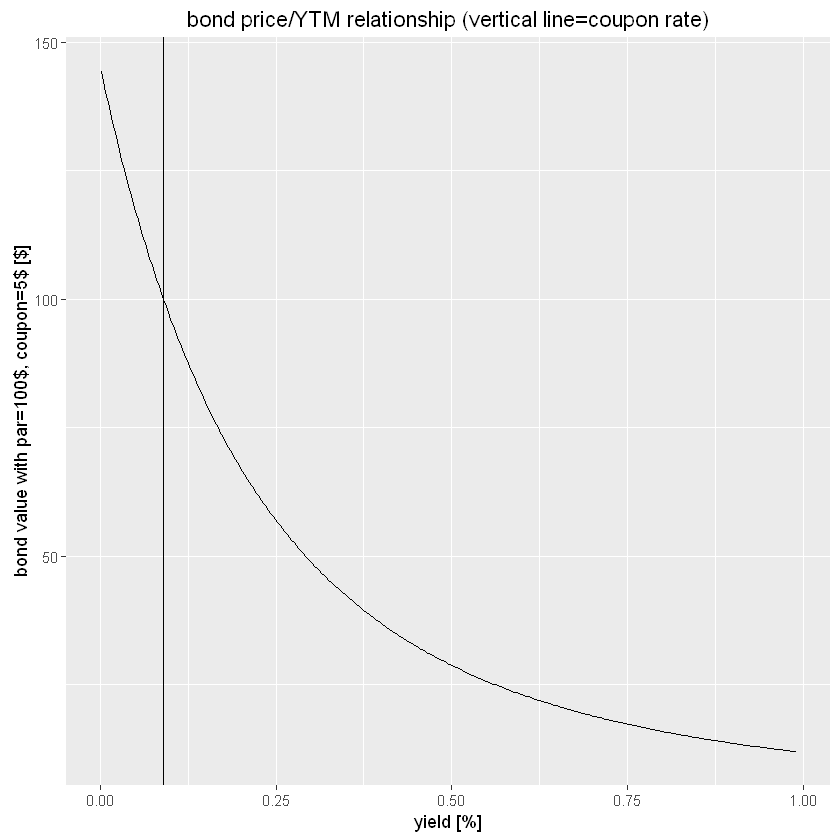

In [33]:
require(ggplot2)
## convert your code into a bond valuation function

# Create function
bondprc <- function(p, r, ttm, y) {
  cf <- c(rep(p * r, ttm - 1), p * (1 + r))
  cf <- data.frame(cf)
  cf$t <- as.numeric(rownames(cf))
  cf$pv_factor <- 1 / (1 + y)^cf$t
  cf$pv <- cf$cf * cf$pv_factor
  sum(cf$pv)
}
# Verify prior result
paste('bond value with par=100$,coupon=5$, yearly yieled y=6%:'
      , bondprc(p=100, r=0.05, ttm=5, y=0.06))


# lets investigate a relation between a changing market yield and 
# and a bond price with a fixed coupon
rvalue<-0.09
ylds<-seq(0.001,0.99,length=300)
bp<-rep(NA,length(ylds))
#compute bond price for different yields in a loop
for( i in 1:length(bp)) {
    bp[i] <- bondprc(p=100, r=rvalue, ttm=5, y=ylds[i])
}
##plot the bond price as a function of yield
df<-data.frame(ylds,bp)
ggplot(df, aes(x=df$ylds, y=df$bp)) + geom_line() + 
geom_vline(xintercept = rvalue) +
labs(x="yield [%]", y='bond value with par=100$, coupon=5$ [$]') +
ggtitle("bond price/YTM relationship (vertical line=coupon rate)")


## Credit Ratings

#### The lower the rating the higher the bond yield (coupon), the higher is a risk of a bond (credit risk = probability of default of  a bond's issuer ) 

* **Investment grade** [AAA - BBB]
* **High Yield (junk bonds** [BB - CCC, lower ]

!NB Many institutions choose to invest only in Investment grade bonds

* Use yields of bonds with the same credit rating 
* if we want to value a BAA rated bonds, we get the data from **Quandl** R package

In [32]:
## Value the 5% bond using the Baa yield you found
library(Quandl)
baa<-Quandl("MOODY/DBAAYLD")
# Identify 9/30/16 yield
baa_yield <- subset(baa, baa$DATE == "2016-09-30")
# Convert yield to decimals and view
baa_yield <- baa_yield$VALUE * 0.01 # 4.29%

paste('baa_yield as of 2016-09-30:', baa_yield)
paste('value of baa bond with coupon at 5%:'
      ,bondprc(p = 100, r = 0.05, ttm = 5, y = 0.0429))


[1] "baa_yield as of 2016-09-30: 0.0429"

[1] "value of baa bond with coupon at 5%: 103.135207912681"

## Baseline Component of Yield
#### Risk-free yield (baseline rate has zero risk of default)

* Yield on recently issued US Treasury with similar maturity
* Risk-free yield is not constant
    * Affected by economy, market interest rates and inflation

##### can be obtained from the Treasury data database





In [34]:
##obtaining 10 year ttm treasury t10 bill serie
library(quantmod)

t10yr <- getSymbols("DGS10", src="FRED", auto.assign = FALSE)
head(t10yr)

Warning message:
: package 'quantmod' was built under R version 3.3.2Loading required package: TTR
Warning message:
: package 'TTR' was built under R version 3.3.2Version 0.4-0 included new data defaults. See ?getSymbols.
    As of 0.4-0, 'getSymbols' uses env=parent.frame() and
 auto.assign=TRUE by default.

 This  behavior  will be  phased out in 0.5-0  when the call  will
 default to use auto.assign=FALSE. getOption("getSymbols.env") and 
 getOptions("getSymbols.auto.assign") are now checked for alternate defaults

 This message is shown once per session and may be disabled by setting 
 options("getSymbols.warning4.0"=FALSE). See ?getSymbols for more details.


           DGS10
1962-01-02  4.06
1962-01-03  4.03
1962-01-04  3.99
1962-01-05  4.02
1962-01-08  4.03
1962-01-09  4.05